<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')
boston_df = boston_df.drop(columns = ['Unnamed: 0'])

#### Add your code below following the instructions given in the course to complete the peer graded assignment


##### 1. Understanding Dataset

In [3]:
boston_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


In [4]:
boston_df.tail(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
496,0.28960,0.0,9.69,0.0,0.585,5.390,72.9,2.7986,6.0,391.0,19.2,21.14,19.7
497,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,19.2,14.10,18.3
498,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,12.92,21.2
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,391.0,19.2,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,14.33,16.8
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,7.88,11.9


- The Dataset contains information derived from the U.S. Census Service, about housing prices in Boston MA.
- Dataset variables:
    - CRIM - per capita crime rate by town
    - ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    - INDUS - proportion of non-retail business acres per town.
    - CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    - NOX - nitric oxides concentration (parts per 10 million)
    - RM - average number of rooms per dwelling
    - AGE - proportion of owner-occupied units built prior to 1940
    - DIS - weighted distances to five Boston employment centres
    - RAD - index of accessibility to radial highways
    - TAX - full-value property-tax rate per $10,000
    - PTRATIO - pupil-teacher ratio by town
    - LSTAT - % lower status of the population
    - MEDV - Median value of owner-occupied homes in $1000's

In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


##### 2. Descriptive Statistics and Visualizations

In [6]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


2.1 Median value of owner-occupied homes in $1000's (MEDV)

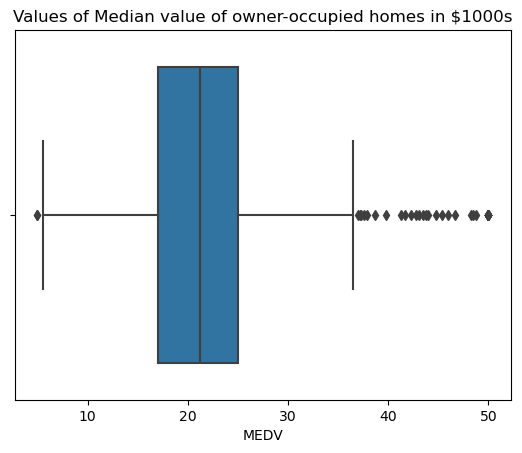

In [14]:
ax = sns.boxplot(x = 'MEDV', data = boston_df)
plt.title('Values of Median value of owner-occupied homes in $1000s')
plt.show()

With this plot, it is possible to see the distribution of the MEDV variable. In the boxplot, we can see the median close to 21 (21.2), the 1st quartile close to 17 (17.025), and the 3rd quartile with value of 25. There is one outlier near a value of 5 and some outliers with values greater than 35. Is possible to conclude that most of data is concentrated around the value 20.

2.2 Charles River dummy variable (CHAS)

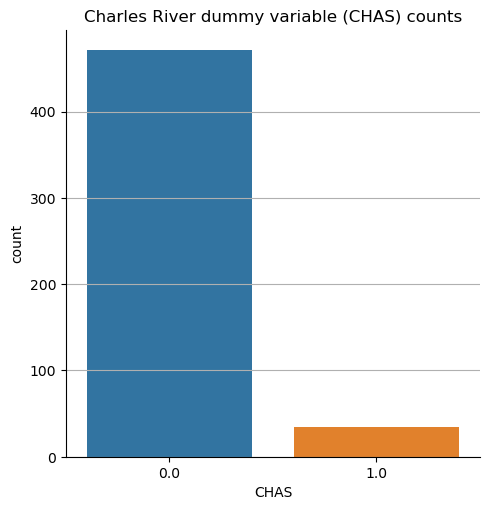

In [7]:
ax = sns.catplot(x = 'CHAS', kind = 'count', data = boston_df)
plt.title('Charles River dummy variable (CHAS) counts')
plt.grid(axis='y')
plt.show()

With this plot, it is possible to see that most of the dataset contains the Charles River dummy variable with value of 1 (if tract bounds river). Fewer than 50 values in the dataset are 0 for this variable (not tract bounds river).

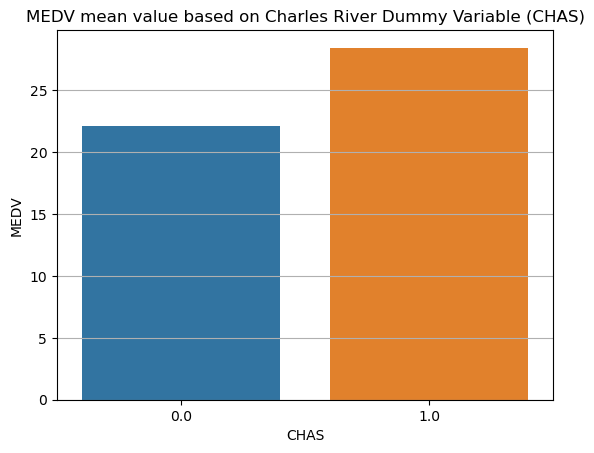

In [16]:
MEDV_CHAS_groups = boston_df.groupby('CHAS')[['MEDV']].mean().reset_index()
ax = sns.barplot(x = 'CHAS', y = 'MEDV', data = MEDV_CHAS_groups)
plt.title('MEDV mean value based on Charles River Dummy Variable (CHAS)')
plt.grid(axis='y')
plt.show()

This plot (above), shows mean value of MEDV for each CHAS value (0 or 1)

2.3 Median value of owner-occupied homes in $1000's (MEDV) variable vs the proportion of owner-occupied units built prior to 1940 (AGE) variable (Discretizing the AGE variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older).

[]

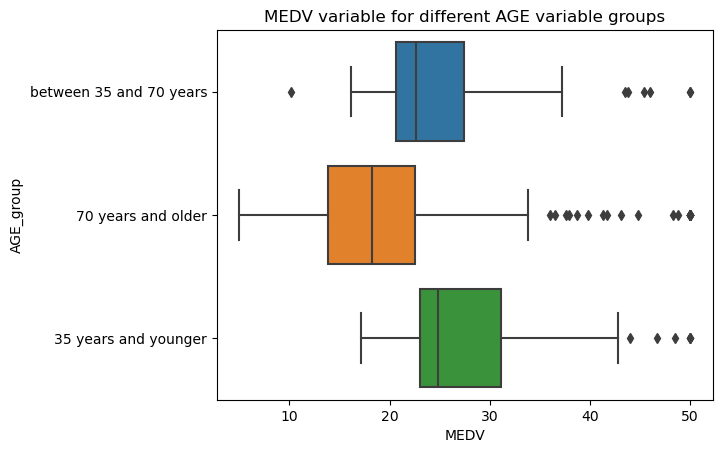

In [13]:
# Creating AGE groups
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_group'] = '70 years and older'

ax = sns.boxplot(x = 'MEDV', y = 'AGE_group', data = boston_df)
plt.title('MEDV variable for different AGE variable groups')
plt.plot()

With this plot, it is possible to see that median and distribution of MEDV values change across AGE groups. MEDV shows the highest median for 35 years and younger group, and the lowest median for 70 years and older group. This may indicate that lower AGES tend to have greater high MEDV values.

2.4 Relationship between Nitric oxide concentration (NOX) and proportion of non-retail business acres per town (INDUS)

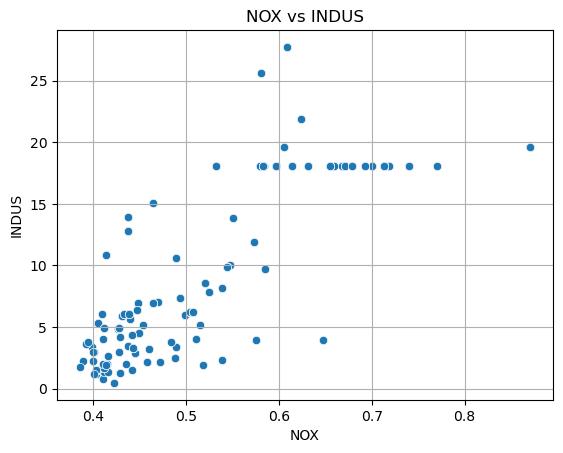

In [14]:
ax = sns.scatterplot(x = 'NOX', y = 'INDUS', data = boston_df)
plt.title('NOX vs INDUS')
plt.grid()
plt.show()

This plot shows that the relationship between NOX and INDUS variables, has a growing trend, which could be aproximated by 45° line for values smaller than 0.6. This indicates a correlation between these variables. For larger NOX values, INDUS values become almost constant, which could indicate industrial areas with higher nitric oxide emissions. This conclusion makes sense, as a high concentration of industries is typically associated with high nitric oxide concentration.

2.5 Pupil to teacher ratio variable (PTRATIO)

c:\Users\luis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


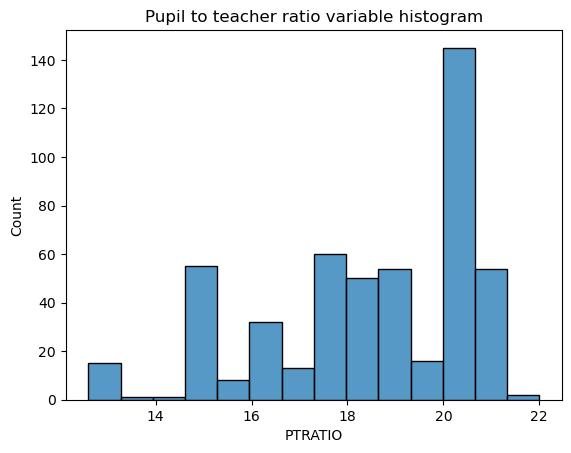

In [30]:
ax = sns.histplot(data = boston_df, x = 'PTRATIO')
plt.title('Pupil to teacher ratio variable histogram')
plt.show()

This histogram shows that most of the values for the pupil-to-teacher ratio variable are around 20, representing significantly more observations than other values of the variable.

##### 3. Appropriate tests to answer the questions provided.

3.1 Is there a significant difference in median value of houses bounded by the Charles river or not?

- State the hypothesis:
    - Null Hypothesis ($H_0$): There is no difference in median value of houses bounded by the Charles river or not
    - Alternative Hypothesis ($H_a$): There is a difference in median value of houses bounded by the Charles river or not
    - $\alpha$ = 0.05

Checking equality of variance:

In [3]:
# levene test
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], center='mean')


LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

Since p-value is less than 0.05, the variances are not equal! I will consider both cases: t test with equal and unequal variaces.

In [4]:
# t test for equal variances
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In [5]:
# t test for unequal variances
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var = False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

For both cases, p-value is less than $\alpha$ value of 0.05, so we reject the null hypothesis as there is no difference in median value of houses bounded by the Charles river or not, and we can conclude that is enough proof that there is a statistical difference in median value of houses based on charles river variable (0 or 1).

3.2 Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? 

- Considering the age variable into three groups: 35 years and younger, between 35 and 70 years and 70 years and older.
- State the hypothesis:
    - $H_0$: $\mu_1$  = $\mu_2$ =  $\mu_3$ (The three group means are equal)
    - $H_a$: $\mu_1$ $\neq$ $\mu_2$ $\neq$ $\mu_3$ (The three group means are different)
    - $\alpha$ = 0.05

In [15]:
# Creating AGE groups
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_group'] = '70 years and older'

Checking equality of variance:

In [7]:
# levene test
scipy.stats.levene(boston_df[boston_df['AGE_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['AGE_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['AGE_group'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

Since the p-value is greater than 0.05, the variance are not equal, we can assume equality of variance

In [9]:
# ANOVA test
f_statistic, p_value = scipy.stats.f_oneway(boston_df[boston_df['AGE_group'] == '35 years and younger']['MEDV'],
                                            boston_df[boston_df['AGE_group'] == 'between 35 and 70 years']['MEDV'],
                                            boston_df[boston_df['AGE_group'] == '70 years and older']['MEDV']
)
print("F_Statistic: {0}, p-value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, p-value: 1.7105011022702984e-15


Since the p-value is less than 0.05, we reject the null hypothesis, and we can conclude that there is enough evidence that, for at least one group of owner occupied units built prior to 1940 (AGE), the mean of median value of houses variable differs. This confirms the differences observed in visualizations of the distributon of MEDV variable for each group.

3.3 Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

- State the hypothesis:
    - $H_0$: There is no association between Nitric oxide concentrations (NOX) and proportion of non-retail business acres per town (INDUS)
    - $H_a$: There is an association between Nitric oxide concentrations (NOX) and proportion of non-retail business acres per town (INDUS)
    - $\alpha$ = 0.05

In [10]:
# Pearson Correlation test
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061241167e-98)

Since the p-value is less than 0.05, we reject the Null Hypothesis and conclude that there is an association between nitric oxide concentrations (NOX) and proportion of non-retail business acres per town (INDUS). The pearson product-moment correlation coefficient, indicates a very high correlation between these two variables. 

3.4 What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?

- State the hypothesis:
    - $H_0$: $\beta1$ = 0. There is no additional impact on weighted distances to five Boston employment centres (DIS) on the median  value of owner-occupied homes in $1000's (MEDV)
    - $H_a$: $\beta1$ $\neq$ 0. There is an additional impact on weighted distances to five Boston employment centres (DIS) on the median  value of owner-occupied homes in $1000's (MEDV)
    - $\alpha$ = 0.05

In [11]:
# Regression test
y = boston_df['MEDV'] # target/dependent variable
X = boston_df['DIS'] # the input variables (or independent variables)

X = sm.add_constant(X) # add Beta 0 to the model
model = sm.OLS(y, X).fit() # Regression fit to build the model
predictions = model.predict(X) # model prediction

# Statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 16 Sep 2024   Prob (F-statistic):           1.21e-08
Time:                        23:35:38   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since p-value is less than 0.05, so we reject the null hypothesis and have evidence that there is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes. The coefficient 1.0916 indicates a positive impact of the weighted distances to five Boston employment centres (DIS) on the median value of owner occupied homes (MEDV). This means that for each unit increase in DIS, the MEDV value is expected to increase by 1.0916.

The R-square value is 0.062. R will be the result of sqrt(0.062), which is a correlation coefficient of approximately 0.24. This indicates a moderate correlation between these two variables.